<a href="https://colab.research.google.com/github/Sieg-Arash/Machine-Learning/blob/master/Copy_of_SRCNN_Reproduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# SRCNN Test in Google Colab
# Upload zip file
src = list(files.upload().values())[0]
#!unzip yang91.zip

In [0]:
!pip install pillow


In [0]:
from google.colab import files
import keras.backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Activation, Input
from keras import optimizers
from keras.models import load_model
from keras.utils import plot_model
import numpy as np
import scipy.misc
import scipy.ndimage
import cv2
import math
import glob
import matplotlib.pyplot as plt
import copy

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
plot_model(model)

In [0]:
import matplotlib.pyplot as plt

history =model.fit(X_train, Y_train, batch_size = 16, epochs = 3, validation_data=(X_val, Y_val),verbose=1)

# # 绘制训练 & 验证的准确率值
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()



Train on 15959 samples, validate on 1243 samples
Epoch 1/3
15959/15959 [==============================] - 111s 7ms/step - loss: 473.6877 - val_loss: 335.3044
Epoch 2/3
15959/15959 [==============================] - 110s 7ms/step - loss: 353.8565 - val_loss: 292.2726
Epoch 3/3
15959/15959 [==============================] - 109s 7ms/step - loss: 323.1272 - val_loss: 272.8585


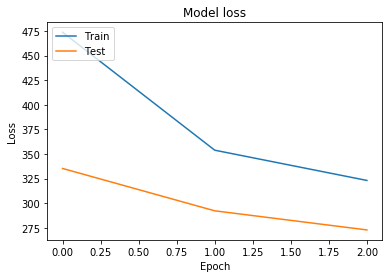

In [0]:
# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  """Entry point for launching an IPython kernel.


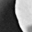

In [0]:
scipy.misc.toimage()
plt.imshow()
%%writefile model.py
!cat main.py
FLAGS.remove_flag_values(FLAGS.flag_values_dict())

In [0]:
FLAGS.remove_flag_values(FLAGS.flag_values_dict())

NameError: ignored

In [0]:
!git clone https://github.com/yifanw90/FSRCNN-TensorFlow
  
  

Cloning into 'FSRCNN-TensorFlow'...
remote: Enumerating objects: 176, done.
remote: Total 176 (delta 0), reused 0 (delta 0), pack-reused 176
Receiving objects: 100% (176/176), 19.26 MiB | 30.43 MiB/s, done.
Resolving deltas: 100% (37/37), done.


In [0]:
!python3 expand_data0.py Train

In [0]:
%cd FSRCNN-TensorFlow

/content/FSRCNN-TensorFlow


In [0]:
%%writefile expand_data.py
import os
import sys
import glob
import numpy as np
from PIL import Image
import pdb

# Artifically expands the dataset by a factor of 19 by scaling and then rotating every image
def main():
  if len(sys.argv) == 2:
    data = prepare_data(sys.argv[1])
  else:
    print("Missing argument: You must specify a folder with images to expand")
    return

  for i in range(len(data)):
    scale(data[i])
    rotate(data[i])

def prepare_data(dataset):
  filenames = os.listdir(dataset)
  data_dir = os.path.join(os.getcwd(), dataset)
  data = glob.glob(os.path.join(data_dir, "*.bmp"))

  return data

def scale(file):
  image = Image.open(file)
  width, height = image.size

  scales = [0.9, 0.8, 0.7, 0.6]
  for scale in scales:
    new_width, new_height = int(width * scale), int(height * scale)
    new_image = image.resize((new_width, new_height), Image.ANTIALIAS)
    new_path = '{}-{}.bmp'.format(file[:-4], scale)
    new_image.save(new_path)

def rotate(file):
  image = Image.open(file)

  rotations = [90, 180, 270]
  for rotation in rotations:
    new_image = image.rotate(rotation, expand=True)
    new_path = '{}-{}.bmp'.format(file[:-4], rotation)
    new_image.save(new_path)

if __name__ == '__main__':
  main()
 


Overwriting expand_data.py


In [0]:
warnings.filterwarnings('error')

In [0]:
!python3  main.py 

{'batch_size': <absl.flags._flag.Flag object at 0x7f7ccb4302b0>,
 'c_dim': <absl.flags._flag.Flag object at 0x7f7ca2f8ebe0>,
 'checkpoint_dir': <absl.flags._flag.Flag object at 0x7f7ca2f8edd8>,
 'data_dir': <absl.flags._flag.Flag object at 0x7f7ca2f8eeb8>,
 'epoch': <absl.flags._flag.Flag object at 0x7f7ccb4297b8>,
 'fast': <absl.flags._flag.BooleanFlag object at 0x7f7ccb403668>,
 'h': <tensorflow.python.platform.app._HelpFlag object at 0x7f7ca2fa2128>,
 'help': <tensorflow.python.platform.app._HelpFlag object at 0x7f7ca2fa2128>,
 'helpfull': <tensorflow.python.platform.app._HelpfullFlag object at 0x7f7ca2fa2198>,
 'helpshort': <tensorflow.python.platform.app._HelpshortFlag object at 0x7f7ca2fa2208>,
 'learning_rate': <absl.flags._flag.Flag object at 0x7f7ca2f80208>,
 'momentum': <absl.flags._flag.Flag object at 0x7f7ca2f802b0>,
 'output_dir': <absl.flags._flag.Flag object at 0x7f7ca2f8ee48>,
 'params': <absl.flags._flag.BooleanFlag object at 0x7f7ca2fa2048>,
 'scale': <absl.flags._fla

In [0]:
%%writefile model.py
from utils import (
  read_data, 
  thread_train_setup,
  train_input_setup,
  test_input_setup,
  save_params,
  merge,
  array_image_save
)

import time
import os

import numpy as np
import tensorflow as tf

from PIL import Image
import pdb

# Based on http://mmlab.ie.cuhk.edu.hk/projects/FSRCNN.html
class FSRCNN(object):
  
  def __init__(self, sess, config):
    self.sess = sess
    self.fast = config.fast
    self.train = config.train
    self.c_dim = config.c_dim
    self.is_grayscale = (self.c_dim == 1)
    self.epoch = config.epoch
    self.scale = config.scale
    self.stride = config.stride
    self.batch_size = config.batch_size
    self.learning_rate = config.learning_rate
    self.momentum = config.momentum
    self.threads = config.threads
    self.params = config.params

    # Different image/label sub-sizes for different scaling factors x2, x3, x4
    scale_factors = [[14, 20], [11, 21], [10, 24]]
    self.image_size, self.label_size = scale_factors[self.scale - 2]
    # Testing uses different strides to ensure sub-images line up correctly
    if not self.train:
      self.stride = [10, 7, 6][self.scale - 2]

    # Different model layer counts and filter sizes for FSRCNN vs FSRCNN-s (fast), (s, d, m) in paper
    model_params = [[56, 12, 4], [32, 5, 1]]
    self.model_params = model_params[self.fast]
    
    self.checkpoint_dir = config.checkpoint_dir
    self.output_dir = config.output_dir
    self.data_dir = config.data_dir
    self.build_model()


  def build_model(self):
    self.images = tf.placeholder(tf.float32, [None, self.image_size, self.image_size, self.c_dim], name='images')
    self.labels = tf.placeholder(tf.float32, [None, self.label_size, self.label_size, self.c_dim], name='labels')
    # Batch size differs in training vs testing
    self.batch = tf.placeholder(tf.int32, shape=[], name='batch')

    # FSCRNN-s (fast) has smaller filters and less layers but can achieve faster performance
    s, d, m = self.model_params

    expand_weight, deconv_weight = 'w{}'.format(m + 3), 'w{}'.format(m + 4)
    self.weights = {
      'w1': tf.Variable(tf.random_normal([5, 5, 1, s], stddev=0.0378, dtype=tf.float32), name='w1'),
      'w2': tf.Variable(tf.random_normal([1, 1, s, d], stddev=0.3536, dtype=tf.float32), name='w2'),
      expand_weight: tf.Variable(tf.random_normal([1, 1, d, s], stddev=0.189, dtype=tf.float32), name=expand_weight),
      deconv_weight: tf.Variable(tf.random_normal([9, 9, 1, s], stddev=0.0001, dtype=tf.float32), name=deconv_weight)
    }

    expand_bias, deconv_bias = 'b{}'.format(m + 3), 'b{}'.format(m + 4)
    self.biases = {
      'b1': tf.Variable(tf.zeros([s]), name='b1'),
      'b2': tf.Variable(tf.zeros([d]), name='b2'),
      expand_bias: tf.Variable(tf.zeros([s]), name=expand_bias),
      deconv_bias: tf.Variable(tf.zeros([1]), name=deconv_bias)
    }

    # Create the m mapping layers weights/biases
    for i in range(3, m + 3):
      weight_name, bias_name = 'w{}'.format(i), 'b{}'.format(i)
      self.weights[weight_name] = tf.Variable(tf.random_normal([3, 3, d, d], stddev=0.1179, dtype=tf.float32), name=weight_name)
      self.biases[bias_name] = tf.Variable(tf.zeros([d]), name=bias_name)

    self.pred = self.model()

    # Loss function (MSE)
    self.loss = tf.reduce_mean(tf.reduce_sum(tf.square(self.labels - self.pred), reduction_indices=0))
    
    self.saver = tf.train.Saver()

  def run(self):
    # SGD with momentum
    self.train_op = tf.train.MomentumOptimizer(self.learning_rate, self.momentum).minimize(self.loss)

    tf.global_variables_initializer().run()

    if self.load(self.checkpoint_dir):
      print(" [*] Load SUCCESS")
    else:
      print(" [!] Load failed...")

    if self.params:
      save_params(self.sess, self.weights, self.biases)
    elif self.train:
      self.run_train()
    else:
      self.run_test()

  def run_train(self):
    start_time = time.time()
    print("Beginning training setup...")
    if self.threads == 1:
      train_input_setup(self)
    else:
      thread_train_setup(self)
    print("Training setup took {} seconds with {} threads".format(time.time() - start_time, self.threads))

    data_dir = os.path.join('./{}'.format(self.checkpoint_dir), "train.h5")
    train_data, train_label = read_data(data_dir)
    print("Total setup time took {} seconds with {} threads".format(time.time() - start_time, self.threads))

    print("Training...")
    start_time = time.time()
    start_average, end_average, counter = 0, 0, 0

    for ep in range(self.epoch):
      # Run by batch images
      batch_idxs = len(train_data) // self.batch_size
      batch_average = 0
      for idx in range(0, batch_idxs):
        batch_images = train_data[idx * self.batch_size : (idx + 1) * self.batch_size]
        batch_labels = train_label[idx * self.batch_size : (idx + 1) * self.batch_size]

        counter += 1
        _, err = self.sess.run([self.train_op, self.loss], feed_dict={self.images: batch_images, self.labels: batch_labels, self.batch: self.batch_size})
        batch_average += err

        if counter % 10 == 0:
          print("Epoch: [%2d], step: [%2d], time: [%4.4f], loss: [%.8f]" \
            % ((ep+1), counter, time.time() - start_time, err))

        # Save every 500 steps
        if counter % 50 == 0:
          self.save(self.checkpoint_dir, counter)

      batch_average = float(batch_average) / batch_idxs
      if ep < (self.epoch * 0.2):
        start_average += batch_average
      elif ep >= (self.epoch * 0.8):
        end_average += batch_average

    # Compare loss of the first 20% and the last 20% epochs
    start_average = float(start_average) / (self.epoch * 0.2)
    end_average = float(end_average) / (self.epoch * 0.2)
    print("Start Average: [%.6f], End Average: [%.6f], Improved: [%.2f%%]" \
      % (start_average, end_average, 100 - (100*end_average/start_average)))

    # Linux desktop notification when training has been completed
    # title = "Training complete - FSRCNN"
    # notification = "{}-{}-{} done training after {} epochs".format(self.image_size, self.label_size, self.stride, self.epoch);
    # notify_command = 'notify-send "{}" "{}"'.format(title, notification)
    # os.system(notify_command)

  
  def run_test(self):
    nx, ny = test_input_setup(self)
    data_dir = os.path.join('./{}'.format(self.checkpoint_dir), "test.h5")
    test_data, test_label = read_data(data_dir)

    print("Testing...")

    start_time = time.time()
    result = self.pred.eval({self.images: test_data, self.labels: test_label, self.batch: nx * ny})
    print("Took %.3f seconds" % (time.time() - start_time))

    result = merge(result, [nx, ny])
    result = result.squeeze()
    image_path = os.path.join(os.getcwd(), self.output_dir)
    image_path = os.path.join(image_path, "test_image.png")

    array_image_save(result * 255, image_path)

  def model(self):
    # Feature Extraction
    conv_feature = self.prelu(tf.nn.conv2d(self.images, self.weights['w1'], strides=[1,1,1,1], padding='VALID') + self.biases['b1'], 1)

    # Shrinking
    conv_shrink = self.prelu(tf.nn.conv2d(conv_feature, self.weights['w2'], strides=[1,1,1,1], padding='SAME') + self.biases['b2'], 2)

    # Mapping (# mapping layers = m)
    prev_layer, m = conv_shrink, self.model_params[2]
    for i in range(3, m + 3):
      weights, biases = self.weights['w{}'.format(i)], self.biases['b{}'.format(i)]
      prev_layer = self.prelu(tf.nn.conv2d(prev_layer, weights, strides=[1,1,1,1], padding='SAME') + biases, i)

    # Expanding
    expand_weights, expand_biases = self.weights['w{}'.format(m + 3)], self.biases['b{}'.format(m + 3)]
    conv_expand = self.prelu(tf.nn.conv2d(prev_layer, expand_weights, strides=[1,1,1,1], padding='SAME') + expand_biases, 7)

    # Deconvolution
    deconv_output = [self.batch, self.label_size, self.label_size, self.c_dim]
    deconv_stride = [1,  self.scale, self.scale, 1]
    deconv_weights, deconv_biases = self.weights['w{}'.format(m + 4)], self.biases['b{}'.format(m + 4)]
    conv_deconv = tf.nn.conv2d_transpose(conv_expand, deconv_weights, output_shape=deconv_output, strides=deconv_stride, padding='SAME') + deconv_biases

    return conv_deconv

  def prelu(self, _x, i):
    """
    PreLU tensorflow implementation
    """
    alphas = tf.get_variable('alpha{}'.format(i), _x.get_shape()[-1], initializer=tf.constant_initializer(0.0), dtype=tf.float32)
    pos = tf.nn.relu(_x)
    neg = alphas * (_x - abs(_x)) * 0.5

    return pos + neg

  def save(self, checkpoint_dir, step):
    model_name = "FSRCNN.model"
    model_dir = "%s_%s" % ("fsrcnn", self.label_size)
    checkpoint_dir = os.path.join(checkpoint_dir, model_dir)

    if not os.path.exists(checkpoint_dir):
        os.makedirs(checkpoint_dir)

    self.saver.save(self.sess,
                    os.path.join(checkpoint_dir, model_name),
                    global_step=step)
    print(os.path.join(checkpoint_dir, model_name))

  def load(self, checkpoint_dir):
    print(" [*] Reading checkpoints...")
    model_dir = "%s_%s" % ("fsrcnn", self.label_size)
    checkpoint_dir = os.path.join(checkpoint_dir, model_dir)

    ckpt = tf.train.get_checkpoint_state(checkpoint_dir)
#     print(ckpt,ckpt.model_checkpoint_path)
    if ckpt and ckpt.model_checkpoint_path:
        ckpt_name = os.path.basename(ckpt.model_checkpoint_path)
        self.saver.restore(self.sess, os.path.join(checkpoint_dir, ckpt_name))
        return True
    else:
        return False

Overwriting model.py


In [0]:
from model import FSRCNN

import numpy as np
import tensorflow as tf

import pprint
import os

flags = tf.app.flags
flags.DEFINE_boolean("fast", False, "Use the fast model (FSRCNN-s) [False]")
flags.DEFINE_integer("epoch", 10, "Number of epochs [10]")
flags.DEFINE_integer("batch_size", 128, "The size of batch images [128]")
flags.DEFINE_float("learning_rate", 1e-3, "The learning rate of gradient descent algorithm [1e-3]")
flags.DEFINE_float("momentum", 0.9, "The momentum value for the momentum SGD [0.9]")
flags.DEFINE_integer("c_dim", 1, "Dimension of image color [1]")
flags.DEFINE_integer("scale", 3, "The size of scale factor for preprocessing input image [3]")
flags.DEFINE_integer("stride", 4, "The size of stride to apply to input image [4]")
flags.DEFINE_string("checkpoint_dir", "checkpoint", "Name of checkpoint directory [checkpoint]")
flags.DEFINE_string("output_dir", "result", "Name of test output directory [result]")
flags.DEFINE_string("data_dir", "Train", "Name of data directory to train on [FastTrain]")
flags.DEFINE_boolean("train", True, "True for training, false for testing [True]")
flags.DEFINE_integer("threads", 1, "Number of processes to pre-process data with [1]")
flags.DEFINE_boolean("params", False, "Save weight and bias parameters [False]")

FLAGS = flags.FLAGS

pp = pprint.PrettyPrinter()

def main(_):
  pp.pprint(flags.FLAGS.__flags)

  if FLAGS.fast:
    FLAGS.checkpoint_dir = 'fast_{}'.format(FLAGS.checkpoint_dir)
  if not os.path.exists(FLAGS.checkpoint_dir):
    os.makedirs(FLAGS.checkpoint_dir)
  if not os.path.exists(FLAGS.output_dir):
    os.makedirs(FLAGS.output_dir)


  with tf.Session() as sess:
    fsrcnn = FSRCNN(sess, config=FLAGS)
    fsrcnn.run()
    
if __name__ == '__main__':
  tf.app.run()

from model import FSRCNN

import numpy as np
import tensorflow as tf

import pprint
import os

flags = tf.app.flags
flags.DEFINE_boolean("fast", False, "Use the fast model (FSRCNN-s) [False]")
flags.DEFINE_integer("epoch", 10, "Number of epochs [10]")
flags.DEFINE_integer("batch_size", 128, "The size of batch images [128]")
flags.DEFINE_float("learning_rate", 1e-3, "The learning rate of gradient descent algorithm [1e-3]")
flags.DEFINE_float("momentum", 0.9, "The momentum value for the momentum SGD [0.9]")
flags.DEFINE_integer("c_dim", 1, "Dimension of image color [1]")
flags.DEFINE_integer("scale", 3, "The size of scale factor for preprocessing input image [3]")
flags.DEFINE_integer("stride", 4, "The size of stride to apply to input image [4]")
flags.DEFINE_string("checkpoint_dir", "checkpoint", "Name of checkpoint directory [checkpoint]")
flags.DEFINE_string("output_dir", "result", "Name of test output directory [result]")
flags.DEFINE_string("data_dir", "Train", "Name of data directo